STEP 1 : Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

STEP 2 : Data Preprocessing

In [4]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [6]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2016-12-23,39.544998,39.637001,39.363998,39.495499,39.450607,12468000
1254,2016-12-27,39.534000,39.893002,39.382851,39.577499,39.532513,15782000
1255,2016-12-28,39.685001,39.711498,39.160000,39.252499,39.207882,23076000
1256,2016-12-29,39.166500,39.296501,38.945999,39.139500,39.095013,14886000
1257,2016-12-30,39.137501,39.139000,38.520500,38.591000,38.547134,35400000


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
training_set = training_data.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)
print(training_data.shape)

[[16.262545]
 [16.563665]
 [16.491436]
 ...
 [39.685001]
 [39.1665  ]
 [39.137501]]
(1258, 1)
(1258, 7)


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))   # NORMALIZAITON!
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08580892],
       [0.09701222],
       [0.09432491],
       ...,
       [0.95725102],
       [0.93795998],
       [0.93688106]])

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [11]:
# Reshaping
# RNN TAKES THE INPUT IN 3 DIMENSION 
# 1 REPRESENTS THE PREDICTOR -> 1 GOOGLE STOCK PRICE
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
X_train.shape

(1198, 60, 1)

STEP 3 : Building LSTM

In [12]:
# Part 3 - Building LSTM
#define an object (initializing LSTM)
model = tf.keras.models.Sequential() 

In [13]:
#ADDING LSTM LAYERS

#FIRST LAYER
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape = (60,1)))
#DROPOUT LAYER
model.add(tf.keras.layers.Dropout(0.2)) # a regularization technique

#SECOND LAYER
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
#DROPOUT LAYER
model.add(tf.keras.layers.Dropout(0.2))

#THIRD LAYER
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
#DROPOUT LAYER
model.add(tf.keras.layers.Dropout(0.2))

#FOURTH LAYER
model.add(tf.keras.layers.LSTM(units=120, activation='relu')) 
# WE ARE DELETING THE RETURN SEQUENCES AS WE DONT WANT TO ADD ANY MORE LAYER ALSO THE DENSE LAYER WILL NOT BE ABLE TO UNDERSTAND IT AS WELL
#DROPOUT LAYER
model.add(tf.keras.layers.Dropout(0.2))

c:\Users\aslam\Desktop\PythonKaam\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#OUTPUT LAYER
model.add(tf.keras.layers.Dense(units=1))
# 1 AS THERE IS ONLY 1 POSSIBLITY CORRESPONDING TO THE STOCK PRICE -> HENCE DIMENSION WILL BE 1

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#compile the model
#adam optimizer is giving better results than rms prop
# since it is a regression problem hence the loss function would be mean squared error
model.compile(optimizer='adam', loss='mean_squared_error')

STEP 4 : Training the Model

In [48]:
#STEP 4 TRAINING THE MODEL
model.fit(X_train, y_train, batch_size=32, epochs=150)

Epoch 1/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0015
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0017
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0014
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 0.0015
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0017
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0019
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0017
Epoch 8/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0016
Epoch 9/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0016
Epoch 10/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0014
Epoch 11/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0016
Epoch 12/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0016
Epoch 13/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0013
Epoch 14/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0016
Epoch 15/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step

In [49]:
# Getting the real stock price of month january 2017
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [50]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,38.940498,39.481499,38.790001,39.306999,39.262321,33146000
1,2017-01-04,39.417999,39.567001,39.158001,39.345001,39.300278,21460000
2,2017-01-05,39.304001,39.723999,39.250999,39.701000,39.655872,26704000
3,2017-01-06,39.763000,40.395000,39.610199,40.307499,40.261684,32804000
4,2017-01-09,40.320000,40.498299,40.141499,40.332500,40.286655,25492000


In [20]:
test_data.shape

(19, 7)

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       19 non-null     object 
 1   Open       19 non-null     float64
 2   High       19 non-null     float64
 3   Low        19 non-null     float64
 4   Close      19 non-null     float64
 5   Adj Close  19 non-null     float64
 6   Volume     19 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [51]:
real_stock_price = test_data.iloc[:, 1:2].values

In [52]:
real_stock_price.shape

(19, 1)

STEP 5 : Making Predictions

In [53]:
#Getting the predicted stock prices of the month Jan 2017
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

#stock prices of previous 60 days for each day of the month Jan 2017
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])

#convert it into numpy arrray
X_test = np.array(X_test)

#convert it into 3D (required to process)   
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 

#getting the predicted stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [54]:
predicted_stock_price

array([[38.88185 ],
       [38.79575 ],
       [38.825886],
       [38.87072 ],
       [38.9363  ],
       [39.07943 ],
       [39.202152],
       [39.25837 ],
       [39.259895],
       [39.281715],
       [39.303284],
       [39.31365 ],
       [39.309605],
       [39.31342 ],
       [39.336597],
       [39.41229 ],
       [39.536533],
       [39.64112 ],
       [39.747467]], dtype=float32)

In [55]:
real_stock_price

array([[38.940498],
       [39.417999],
       [39.304001],
       [39.763   ],
       [40.32    ],
       [40.393002],
       [40.25    ],
       [40.356998],
       [40.374001],
       [40.354   ],
       [40.290501],
       [40.256001],
       [40.345501],
       [40.362499],
       [41.115002],
       [41.480999],
       [41.890499],
       [41.7355  ],
       [40.733002]])

In [56]:
real_stock_price.shape, predicted_stock_price.shape

((19, 1), (19, 1))

STEP 6 : Visualization


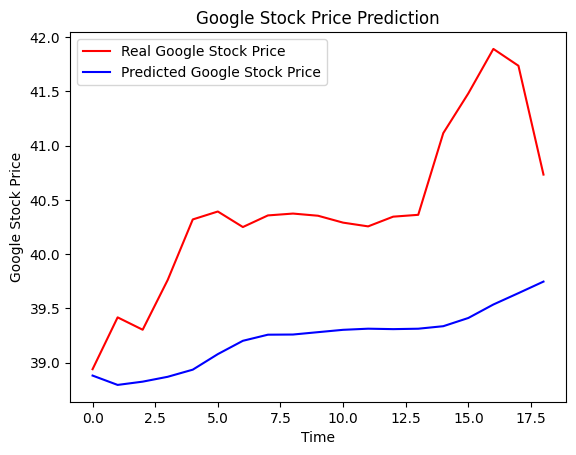

In [57]:
#VISUALIZING THE RESULTS

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()